# Logistic Regression based OCR

 # Importing necessary files

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

# Used for Confusion Matrix
from sklearn import metrics

%matplotlib inline

# Load & Checking data

In [2]:
digits = load_digits()
digits.data.shape

(1797, 64)

In [3]:
digits.target.shape

(1797,)

# Okay Now, let's see some images

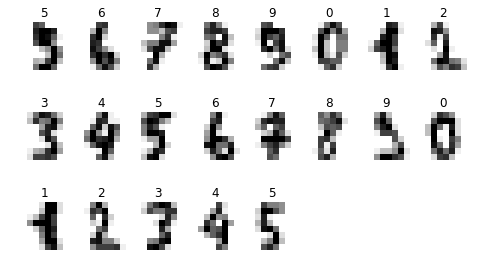

In [4]:
label_images = list(zip(digits.images, digits.target))
plt.figure(figsize = (8, 8))
for index, (image, label) in enumerate (label_images[5 : 26]):
    plt.subplot(5, 8, index + 1)
    plt.axis("off")
    plt.imshow(image, cmap = plt.cm.gray_r, interpolation = "nearest")
    plt.title("%i" %label)

# Splitting data

In [5]:
# test_size: what proportion of original data is used for test set
x_train, x_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size=0.25, random_state=0)

# Checking, if the splitting works or not

In [6]:
print(x_train.shape)

(1347, 64)


In [7]:
print(y_train.shape)

(1347,)


In [8]:
print(x_test.shape)

(450, 64)


In [9]:
print(y_test.shape)

(450,)


# Importing Logistic regression for our model

In [10]:
from sklearn.linear_model import LogisticRegression


In [11]:
logisticRegr = LogisticRegression()


# Training data

In [12]:
logisticRegr.fit(x_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

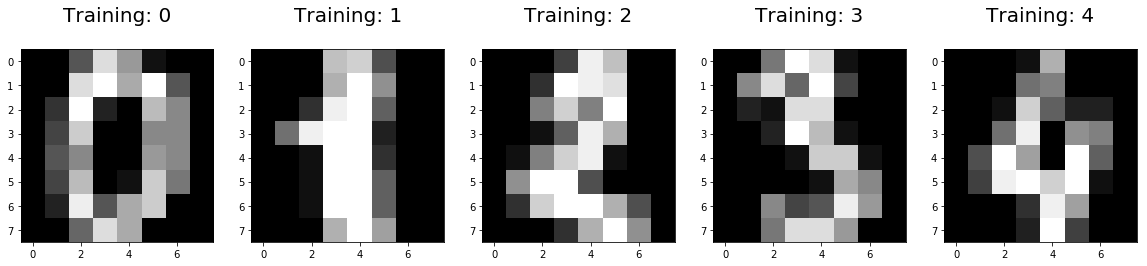

In [13]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

# True Predicting...

In [14]:
predictions = logisticRegr.predict(x_test)

In [15]:
index = 0
classifiedIndex = []
for predict, actual in zip(predictions, y_test):
    if predict == actual: 
        classifiedIndex.append(index)
    index +=1

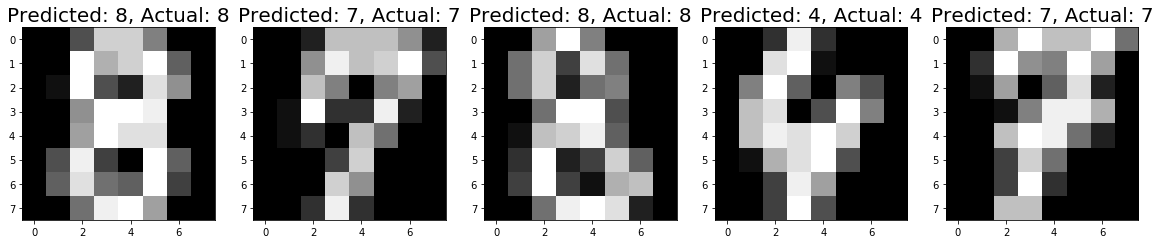

In [16]:

plt.figure(figsize=(20,4))
for plotIndex, wrong in enumerate(classifiedIndex[20:25]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(x_test[wrong], (8,8)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[wrong], y_test[wrong]), fontsize = 20)


# False Predicting...

In [17]:
predictions = logisticRegr.predict(x_test)

In [18]:
index = 0
misclassifiedIndex = []
for predict, actual in zip(predictions, y_test):
    if predict != actual: 
        misclassifiedIndex.append(index)
    index +=1

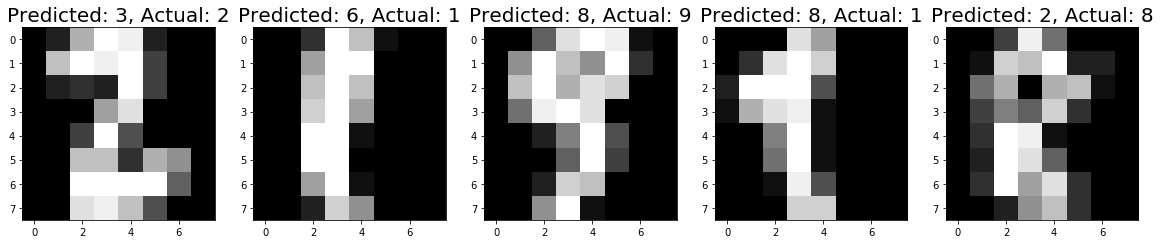

In [19]:
plt.figure(figsize=(20,4))
for plotIndex, wrong in enumerate(misclassifiedIndex[10:15]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(x_test[wrong], (8,8)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[wrong], y_test[wrong]), fontsize = 20)

# Accuracy of our model

In [20]:
score = logisticRegr.score(x_test, y_test)
print("Accuracy of Logistic Regression model is: {0:.4f}%".format(score*100))

Accuracy of Logistic Regression model is: 95.3333%


# Confusion Matrix (Seaborn)

Usually a confusion matrix is used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.

In [21]:
predictions = logisticRegr.predict(x_test)

In [22]:
cm = metrics.confusion_matrix(y_test, predictions)

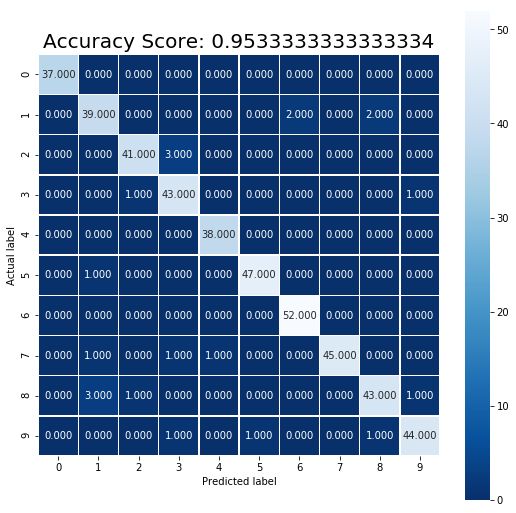

In [23]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 20);

Here as you can see, the correlation with Actual label to Predicted label is a pure diagonal. 

# Thank You.


© NELOY CHANDRA BARDHAN